# 회귀 모형

## 회귀식

- 독립변수(입력변수)
- 종속변수(출력변수)
- 식의 형태(선형식 : y=bx+a1x1+a2x2+a3x3+...)
            (비선형식 : 다차함수) y=b+logx1)
                        지수함수) y=a1x1+a2x2+a3x1^2x2
        

## 회귀식의 구현

### 일반 회귀식

- 식의 형태 알려줌
- 회귀식의 모형 지정함

### 딥러닝

- 입, 출력 변수값만 알려줌. 기계가 알아서 학습
- 회귀식의 모형 지정 X
- ex. 이미지 분류 음성, 필기체 인식

# 상관 분석

- 머신러닝 학습 전 이해를 위해
- 변수들 사이의 연관성 분석 (상관계수, 산포도)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
w=pd.read_csv('chi_weight.txt')
w.head(2)

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12


## 상관계수

In [15]:
w.corr() #상관계수 보기(병아리의 몸무게가 어떤 것에 영향 많이 받는가?)

,weight,egg_weight,movement,food
weight,1.000000,0.957169,0.380719,0.877574
egg_weight,0.957169,1.000000,0.428246,0.808147
movement,0.380719,0.428246,1.000000,0.319011
food,0.877574,0.808147,0.319011,1.000000


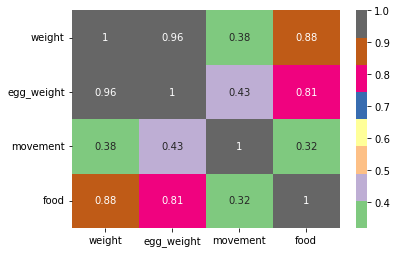

In [17]:
sns.heatmap(w.corr(),annot=True,cmap='Accent')
plt.show()

## 산포도

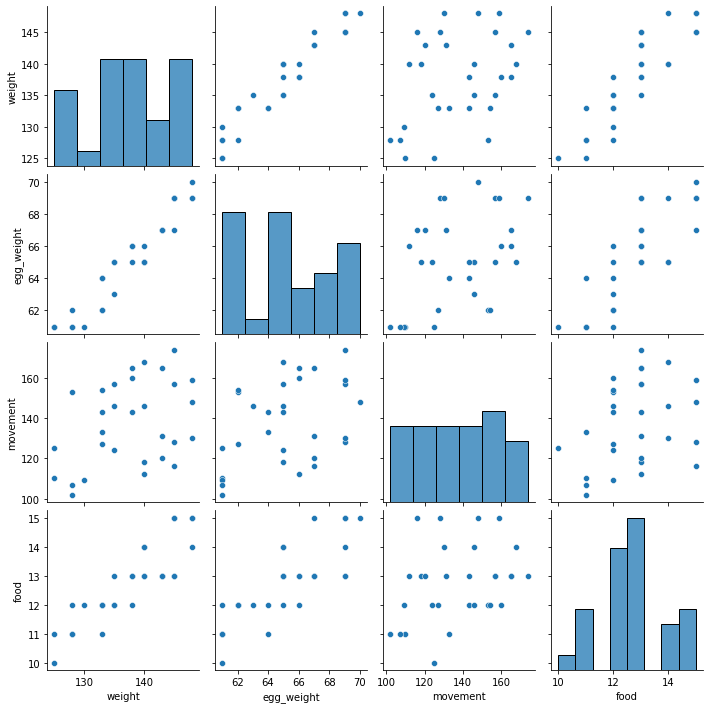

In [19]:
sns.pairplot(w)
plt.show()

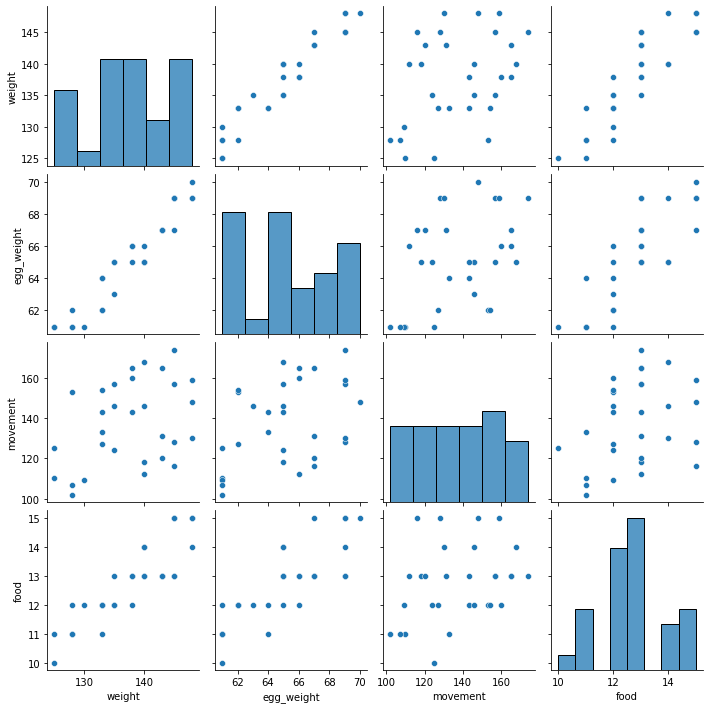

In [20]:
sns.pairplot(w[['weight','egg_weight','movement','food']])
plt.show()

# 회귀식의 추정

## 회귀식

- 실제값과 예측값 사이의 오차를 최소화하는 식

## 전체 샘플에 대한 오차의 측정방법

- 오차의 합(평균) : e1+e2+e3+e4
- 오차 절대값의 합 평균 : |e1|+|e2|+|e3|+|e4|
- 오차 자승값의 합 평균 : (e1)^2+(e2)^2+(e3)^3+(e4)^2  -> 멀리 떨어진 것에 대해 벌점 더 부여

# scikit-learn 패키지 사용

## 회귀모형

## 개발 과정

1. 훈련 데이터, 테스트 데이터 분리
2. 회귀 모형 훈련
3. 훈련 결과 검증
4. 테스트 데이터 적용

### 1) 훈련데이터, 테스트 데이터 분리

In [3]:
X=w[['egg_weight','movement','food']]
y=w['weight']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### 2) 회귀 모형 훈련

In [17]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### 3) 훈련 결과 검증

In [18]:
print(lr.intercept_,lr.coef_,lr.score(X_train,y_train))

-0.3446936591654435 [ 1.86699127 -0.0120331   1.39646562] 0.957826623850879


### 4) 테스트 데이터 적용

In [19]:
lr.score(X_test,y_test)

0.7525750678490816

In [20]:
lr.predict(X_test)

array([137.74388602, 130.31325496, 141.32143825, 141.45380236,
       136.2752218 , 138.53869659])

# statsmodel 패키지 사용

## 회귀모형

## 개발 과정

1. 훈련데이터, 테스트 데이터 분리
2. 회귀 모형 훈련
3. 훈련 결과 검증
4. 테스트 데이터 적용

### 1) 훈련데이터, 테스트 데이터 분리

In [4]:
import statsmodels.api as sm

In [5]:
X_train_add_constant=sm.add_constant(X_train)

In [24]:
sm.OLS.dtype()

AttributeError: type object 'OLS' has no attribute 'dtype'

### 2) 회귀 모형 훈련

In [6]:
sm_lr_ac=sm.OLS(y_train,X_train_add_constant).fit()

### 3) 훈련 결과 검증

In [7]:
sm_lr_ac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           6.46e-14
Time:                        01:34:38   Log-Likelihood:                -44.064
No. Observations:                  24   AIC:                             96.13
Df Residuals:                      20   BIC:                             100.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3447      9.866     -0.035      0.972     -20.925      20.236
egg_weight     1.8670      0.240      7.794      0.000       1.367       2.367
movement      -0.0120      0.020     -0.590      0.562      -0.055       0.030
food           1.3965      0.457      3.054      0.006       0.443       2.350
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   2.690
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.786
Skew:                          -0.274   Prob(JB):                        0.675
Kurtosis:                       2.303   Cond. No.                     4.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
print(sm_lr_ac.params)

const        -0.344694
egg_weight    1.866991
movement     -0.012033
food          1.396466
dtype: float64


In [9]:
sm_lr_ac.rsquared

0.9578266238508791

### 4) 테스트 데이터 적용

In [10]:
# Total Sum of Squares

In [11]:
SST=np.sum((y_test-y_test.mean())**2)

In [12]:
SST

86.0

In [29]:
# Residual Sum of Squares

In [20]:
y_pred=sm.OLS(y_train,X_train_add_constant).predict(X_test)

ValueError: shapes (24,4) and (6,3) not aligned: 4 (dim 1) != 6 (dim 0)

In [30]:
SSR=np.sum((y_pred-y_test)**2)

NameError: name 'y_pred' is not defined

# 2차 회귀식

In [31]:
data=pd.read_csv('quadratic_sample.csv')
data.head(2)

,x,x2,(x-10)*(x-10),(rand()-0.5)*10,y
0,0.1,0.01,98.01,-3.191019,94.818981
1,0.2,0.04,96.04,-1.406560,94.633440


In [32]:
# y== (x-10)*(x-10) + (rand()-0.5)*10

In [36]:
X_train,X_test,y_train,y_test=train_test_split(data[['x']],data['y'],test_size=0.2)

In [37]:
lr=linear_model.LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
print(lr.intercept_,lr.coef_,lr.score(X_train,y_train))

31.787586523093022 [0.08482251] 0.0002761024959252456


In [68]:
lr.score(X_test,y_test) #0에 가까울수록 설명X

-0.0007446360214962144

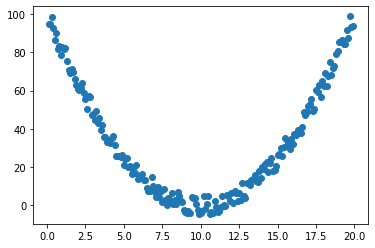

In [67]:
plt.scatter(data['x'],data['y'])
plt.show()

## 회귀 모형 개발

- x^2 를 나타내는 입력변수 추가(이차식은 x만으로 예측x -> x와 x^2 두개를 사용해 예측해야됨)
- 회귀식에 x^2추가

### scikit-learn 사용

#### 회귀식에 x^2 추가

In [72]:
X_train,X_test,y_train,y_test=train_test_split(data[['x','x2']],data['y'],test_size=0.2)
lr=linear_model.LinearRegression()

In [73]:
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
print(lr.intercept_,lr.coef_,lr.score(X_train,y_train))

98.7549227797533 [-19.89467514   0.99860215] 0.9891449730945907


In [75]:
lr.score(X_test,y_test)

0.9919689534358821

#### 검증

In [77]:
sm_reg=sm.OLS(y_train,sm.add_constant(X_train)).fit()

In [78]:
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     7108.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          6.01e-154
Time:                        22:33:13   Log-Likelihood:                -397.20
No. Observations:                 159   AIC:                             800.4
Df Residuals:                     156   BIC:                             809.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.7549      0.753    131.180      0.000      97.268     100.242
x            -19.8947      0.172   -115.477      0.000     -20.235     -19.554
x2             0.9986      0.008    119.227      0.000       0.982       1.015
==============================================================================
Omnibus:                       40.664   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.142
Skew:                           0.066   Prob(JB):                       0.0171
Kurtosis:                       1.899   Cond. No.                         578.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### statsmodel 패키지 사용

#### 회귀식에 x^2 추가

In [82]:
import statsmodels.formula.api as smf

In [83]:
lm_reg=smf.ols(formula='y~x+I(x**2)',data=data).fit()

#### 검증

In [85]:
lm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9781.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          4.55e-197
Time:                        22:36:25   Log-Likelihood:                -498.18
No. Observations:                 199   AIC:                             1002.
Df Residuals:                     196   BIC:                             1012.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.1629      0.640    154.877      0.000      97.900     100.426
x            -19.9726      0.148   -135.116      0.000     -20.264     -19.681
I(x ** 2)      1.0012      0.007    139.859      0.000       0.987       1.015
==============================================================================
Omnibus:                       97.616   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.802
Skew:                           0.142   Prob(JB):                      0.00166
Kurtosis:                       1.790   Cond. No.                         552.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Shallow Learning vs Deep Learning

## Tensorflow

- 변수 x만 입력값으로 사용
- 모형이 중간노드를 사용하여 자동으로 (x^2변수 생성하여) y값 예측

## 개발과정

1. 훈련데이터, 테스트 데이터 분리
2. 딥러닝 모형 개발
3. 딥러닝 모형 훈련
4. 훈련 결과 검증
5. 테스트 데이터 적용

### 1) 훈련데이터, 테스트 데이터 분리

In [91]:
X_train, X_test, y_train, y_test=train_test_split(data[['x']],data['y'],test_size=0.2)

In [92]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'